<a href="https://colab.research.google.com/github/pinilDissanayaka/Tyre-Quality-Classification/blob/team/Notebooks/Tyre_Quality_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install livelossplot
!pip install visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 10.7 MB/s eta 0:00:00


In [2]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [3]:
! kaggle datasets download warcoder/tyre-quality-classification

100% 2.66G/2.66G [00:37<00:00, 55.6MB/s]
100% 2.66G/2.66G [00:37<00:00, 75.9MB/s]


In [4]:
! unzip /content/tyre-quality-classification.zip

Archive:  /content/tyre-quality-classification.zip
  inflating: Digital images of defective and good condition tyres/defective/Defective (1).jpg  
  inflating: Digital images of defective and good condition tyres/defective/Defective (10).jpg  
  inflating: Digital images of defective and good condition tyres/defective/Defective (100).jpg  
  inflating: Digital images of defective and good condition tyres/defective/Defective (1000).jpg  
  inflating: Digital images of defective and good condition tyres/defective/Defective (1001).jpg  
  inflating: Digital images of defective and good condition tyres/defective/Defective (1002).jpg  
  inflating: Digital images of defective and good condition tyres/defective/Defective (1003).jpg  
  inflating: Digital images of defective and good condition tyres/defective/Defective (1004).jpg  
  inflating: Digital images of defective and good condition tyres/defective/Defective (1005).jpg  
  inflating: Digital images of defective and good condition tyre

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cv2 as cv
import os
import random
from glob import glob
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import *
from tensorflow.keras.applications import ResNet101V2
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler, ModelCheckpoint
from livelossplot import PlotLossesKerasTF
import visualkeras
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings(action = 'ignore')

In [6]:
mainDir = r'/content/Digital images of defective and good condition tyres'

In [7]:
outDir = r'/content/output'

if not (os.path.exists(outDir)):
  print("Output directory is not exists.......")
  print("making such directory...")
  os.mkdir(outDir)

  os.path.join(outDir, '/Model')

Output directory is not exists.......
making such directory...


In [8]:
modelDir = os.path.join(outDir, 'Model')
figDir = os.path.join(outDir, 'Figure')


if not (os.path.exists(modelDir)):
  print("Directory is not exists.......")
  print("making such directory...")
  os.mkdir(modelDir)


if not (os.path.exists(figDir)):
  print("Directory is not exists.......")
  print("making such directory...")
  os.mkdir(figDir)

Directory is not exists.......
making such directory...
Directory is not exists.......
making such directory...


In [11]:
def plotImgFromDir(directory, nrows, ncols):
  labels = os.listdir(directory)
  for label in labels:
    print(label)
    plotPath = os.path.join(directory, label)
    plotImg(plotPath, label, nrows, ncols)



def plotImg(path, label, nrows, ncols):
  path = glob(path + '/*')
  selectedPath = random.choices(path, k = (ncols * nrows))
  sns.set()
  plt.figure(figsize = (16, 16))
  for i, path in enumerate(selectedPath):
    img = plt.imread(path)
    plt.subplot(nrows, ncols, i +1)
    plt.axis('off')
    plt.imshow(img)
  plt.savefig(figDir + '/' + label)
  plt.show()

defective


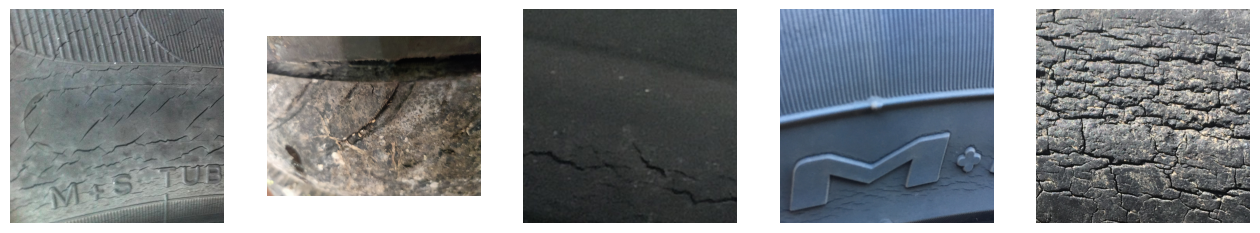

good


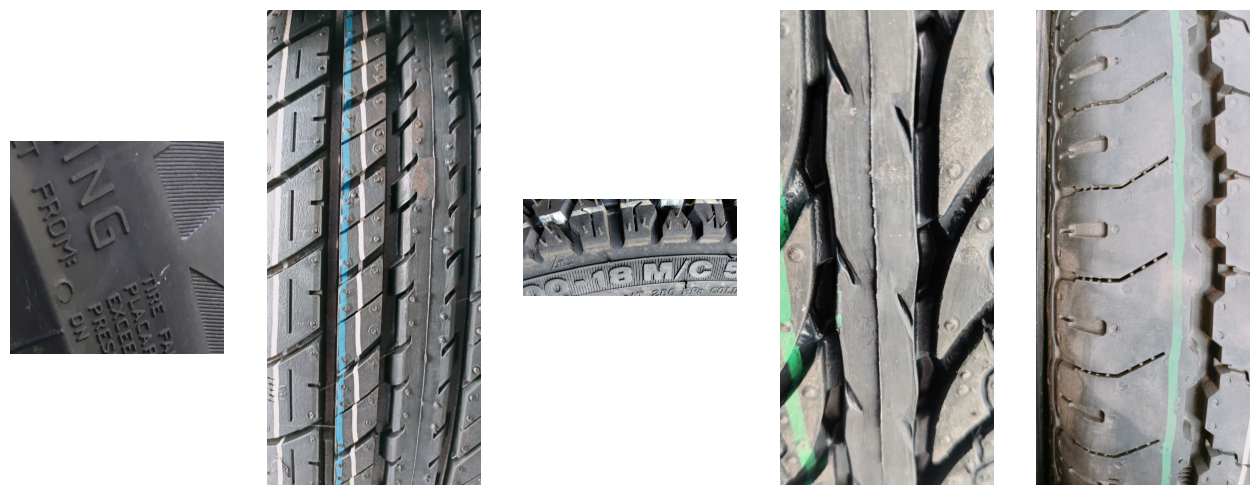

In [12]:
plotImgFromDir(mainDir, 1, 5)